[View in Colaboratory](https://colab.research.google.com/github/hd-nguyen/nhd-test/blob/master/Truong_CNN.ipynb)

In [1]:
import keras
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import time
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from google.colab import files

Using TensorFlow backend.


In [3]:
files.upload()

trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('testing.csv', delimiter=',')
trainingset

Saving testing.csv to testing.csv
Saving training.csv to training.csv


array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 5.0999994, 0.       ,
        1.       ],
       [0.       , 0.       , 0.       , ..., 5.0999994, 0.       ,
        1.       ],
       [0.       , 0.       , 0.       , ..., 5.0999994, 0.       ,
        1.       ]])

In [11]:
# Get data and labels
n_inputs = 49 # 7x7 pixels
n_classes = 2 # 
img_dim = 7

x_training = trainingset[:, 0:n_inputs]
y_training = trainingset[:, n_inputs:n_inputs + n_classes]

x_testing = testingset[:, 0:n_inputs]
y_testing = testingset[:, n_inputs:n_inputs + n_classes]

# Reshape
x_training = x_training.reshape(x_training.shape[0], img_dim, img_dim)
x_training = np.expand_dims(x_training, axis=4)

x_testing = x_testing.reshape(x_testing.shape[0], img_dim, img_dim)
x_testing = np.expand_dims(x_testing, axis=4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  app.launch_new_instance()


In [12]:
# 7x7 portrait image
input_image = Input(shape=(img_dim, img_dim, 1), name='Input')

# conv, pooling layers + dropout
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', name='conv1_1')(input_image)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu', name='conv1_2')(x)
#x = MaxPooling2D(pool_size=(2, 2), name='pooling1')(x)
#x = Dropout(rate=0.5, name='conv_dropout1')(x)

x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', name='conv2_1')(x)
x = MaxPooling2D(pool_size=(2, 2), name='pooling2')(x)
#x = Dropout(rate=0.5, name='conv_dropout2')(x)

# matrix ---> vector
x = Flatten(name='flatten')(x)

# FC layers + dropout
x = Dense(units=1024, activation='relu', name='fc1')(x)
#x = Dropout(rate=0.5, name='fc_dropout1')(x)

output_label = Dense(units=n_classes, activation='softmax', name='Output')(x)

# define model
model = Model(inputs=input_image, outputs=output_label, name='cnn')

# print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 7, 7, 1)           0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 7, 7, 32)          320       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 5, 5, 32)          9248      
_________________________________________________________________
conv2_1 (Conv2D)             (None, 5, 5, 32)          9248      
_________________________________________________________________
pooling2 (MaxPooling2D)      (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 1024)              132096    
__________

In [9]:
# declare learning rate, loss function, and model metric
loss = 'categorical_crossentropy'
lr = 0.001
model.compile(loss=loss, optimizer=Adam(lr=lr), metrics=['accuracy'])

# train the model
batch_size = 128
epochs = 15

starting_time = time.time()
history = model.fit(x_training, y_training,
                    batch_size,
                    validation_data=(x_testing, y_testing),
                    epochs=epochs)
print('> training time is %.4f minutes' % ((time.time() - starting_time)/60))

Train on 478489 samples, validate on 9983 samples
Epoch 1/15
478489/478489 [==============================] - 37s 76us/step - loss: 0.0214 - acc: 0.9979 - val_loss: 0.0145 - val_acc: 0.9982
Epoch 2/15
 11264/478489 [..............................] - ETA: 35s - loss: 0.0043 - acc: 0.9994

478489/478489 [==============================] - 36s 75us/step - loss: 0.0022 - acc: 0.9995 - val_loss: 0.0136 - val_acc: 0.9976
Epoch 3/15
148608/478489 [========>.....................] - ETA: 24s - loss: 0.0020 - acc: 0.9997

478489/478489 [==============================] - 36s 75us/step - loss: 0.0016 - acc: 0.9997 - val_loss: 0.0129 - val_acc: 0.9980
Epoch 4/15
201728/478489 [===========>..................] - ETA: 20s - loss: 0.0021 - acc: 0.9996

478489/478489 [==============================] - 36s 75us/step - loss: 0.0016 - acc: 0.9997 - val_loss: 0.0142 - val_acc: 0.9980
Epoch 5/15
222336/478489 [============>.................] - ETA: 19s - loss: 0.0016 - acc: 0.9997

478489/478489 [==============================] - 36s 75us/step - loss: 0.0013 - acc: 0.9998 - val_loss: 0.0092 - val_acc: 0.9965
Epoch 6/15
229632/478489 [=============>................] - ETA: 18s - loss: 0.0017 - acc: 0.9998

478489/478489 [==============================] - 36s 75us/step - loss: 0.0017 - acc: 0.9997 - val_loss: 0.0063 - val_acc: 0.9984
Epoch 7/15
229376/478489 [=============>................] - ETA: 18s - loss: 0.0010 - acc: 0.9998

478489/478489 [==============================] - 36s 75us/step - loss: 0.0012 - acc: 0.9998 - val_loss: 0.0161 - val_acc: 0.9973
Epoch 8/15
227584/478489 [=============>................] - ETA: 18s - loss: 0.0012 - acc: 0.9998

478489/478489 [==============================] - 36s 75us/step - loss: 0.0025 - acc: 0.9997 - val_loss: 0.0083 - val_acc: 0.9983
Epoch 9/15
228864/478489 [=============>................] - ETA: 18s - loss: 9.7025e-04 - acc: 0.9998

478489/478489 [==============================] - 36s 75us/step - loss: 0.0011 - acc: 0.9998 - val_loss: 0.0197 - val_acc: 0.9980
Epoch 10/15
227200/478489 [=============>................] - ETA: 18s - loss: 0.0013 - acc: 0.9998

478489/478489 [==============================] - 36s 75us/step - loss: 0.0012 - acc: 0.9998 - val_loss: 0.0186 - val_acc: 0.9979
Epoch 11/15
227456/478489 [=============>................] - ETA: 18s - loss: 8.0756e-04 - acc: 0.9999

478489/478489 [==============================] - 36s 75us/step - loss: 0.0010 - acc: 0.9998 - val_loss: 0.0232 - val_acc: 0.9981
Epoch 12/15
223488/478489 [=============>................] - ETA: 18s - loss: 9.4419e-04 - acc: 0.9998

478489/478489 [==============================] - 36s 75us/step - loss: 9.7417e-04 - acc: 0.9998 - val_loss: 0.0069 - val_acc: 0.9991
Epoch 13/15
218880/478489 [============>.................] - ETA: 19s - loss: 9.1235e-04 - acc: 0.9998

478489/478489 [==============================] - 36s 75us/step - loss: 0.0014 - acc: 0.9998 - val_loss: 0.0133 - val_acc: 0.9985
Epoch 14/15
225280/478489 [=============>................] - ETA: 18s - loss: 0.0011 - acc: 0.9998

478489/478489 [==============================] - 36s 75us/step - loss: 0.0011 - acc: 0.9998 - val_loss: 0.0062 - val_acc: 0.9983
Epoch 15/15
227456/478489 [=============>................] - ETA: 18s - loss: 0.0019 - acc: 0.9998

478489/478489 [==============================] - 36s 75us/step - loss: 0.0014 - acc: 0.9998 - val_loss: 0.0122 - val_acc: 0.9988
> training time is 9.0107 minutes


In [7]:
score = model.evaluate(x_testing, y_testing)
print('Test loss:', score[0])
print('Test accuracy:', score[1] * 100)

9983/9983 [==============================] - 1s 86us/step
Test loss: 0.0037841218813478793
Test accuracy: 99.92988079735551


In [0]:
def get_state(ohv):
    indx = np.argmax(ohv)
    # 0=Attacked, 1=Normal    
    if indx == 0:
        return 'attacked'
    elif indx == 1:
        return 'normal'

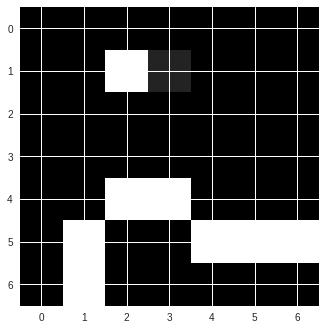

> testing image index: 5975
> true state: attacked
> predicted state: attacked


In [24]:
img_indx = np.uint32(np.random.rand()*(testingset.shape[0] - 1))
sample = x_testing[img_indx, :]
sample = sample.reshape(img_dim, img_dim)

pred_cls = model.predict(sample.reshape(1, img_dim, img_dim, 1))

plt.imshow(sample, cmap='gray')
plt.show()
print('> testing image index: %d\n> true state: %s\n> predicted state: %s'
      % (img_indx, get_state(y_testing[img_indx, :]), get_state(pred_cls)))